<a href="https://colab.research.google.com/github/demarillacizere/cardiac-prediction-model/blob/master/AI_Summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Acquire data
we got the data from Kaggle

##Modules that we will be using for data analysis

In [114]:
#importing all the needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import scipy as sc

##Dataset loading

In [115]:
dataset = pd.read_csv("/content/framingham.csv")

###Getting an overview of the **data**

In [116]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000,0,0.000,0.000,0,0,0,195.000,106.000,70.000,26.970,80.000,77.000,0
1,0,46,2.000,0,0.000,0.000,0,0,0,250.000,121.000,81.000,28.730,95.000,76.000,0
2,1,48,1.000,1,20.000,0.000,0,0,0,245.000,127.500,80.000,25.340,75.000,70.000,0
3,0,61,3.000,1,30.000,0.000,0,1,0,225.000,150.000,95.000,28.580,65.000,103.000,1
4,0,46,3.000,1,23.000,0.000,0,0,0,285.000,130.000,84.000,23.100,85.000,85.000,0


##Let us check dataset's attribute

In [117]:
#Shape of dataset
print ('No. of Records :', dataset.shape[0], '\nNo. of Features : ', dataset.shape[1])

No. of Records : 4240 
No. of Features :  16


In [118]:
#more info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [119]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.000,0.429,0.495,0.000,0.000,0.000,1.000,1.000
age,4240.000,49.580,8.573,32.000,42.000,49.000,56.000,70.000
education,4135.000,1.979,1.020,1.000,1.000,2.000,3.000,4.000
currentSmoker,4240.000,0.494,0.500,0.000,0.000,0.000,1.000,1.000
cigsPerDay,4211.000,9.006,11.922,0.000,0.000,0.000,20.000,70.000
BPMeds,4187.000,0.030,0.170,0.000,0.000,0.000,0.000,1.000
prevalentStroke,4240.000,0.006,0.077,0.000,0.000,0.000,0.000,1.000
prevalentHyp,4240.000,0.311,0.463,0.000,0.000,0.000,1.000,1.000
diabetes,4240.000,0.026,0.158,0.000,0.000,0.000,0.000,1.000
totChol,4190.000,236.700,44.591,107.000,206.000,234.000,263.000,696.000


##Data cleaning and transformation

In [120]:
dataset.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


finding the number of values that are missing

In [121]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [122]:
#percent null values

dataset.isnull().sum() / dataset.shape[0] * 100

male              0.000
age               0.000
education         2.476
currentSmoker     0.000
cigsPerDay        0.684
BPMeds            1.250
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           1.179
sysBP             0.000
diaBP             0.000
BMI               0.448
heartRate         0.024
glucose           9.151
TenYearCHD        0.000
dtype: float64

###We will go further and visualize the missing data 
we can use the mssingno library to achieve that

In [123]:
import missingno as msno

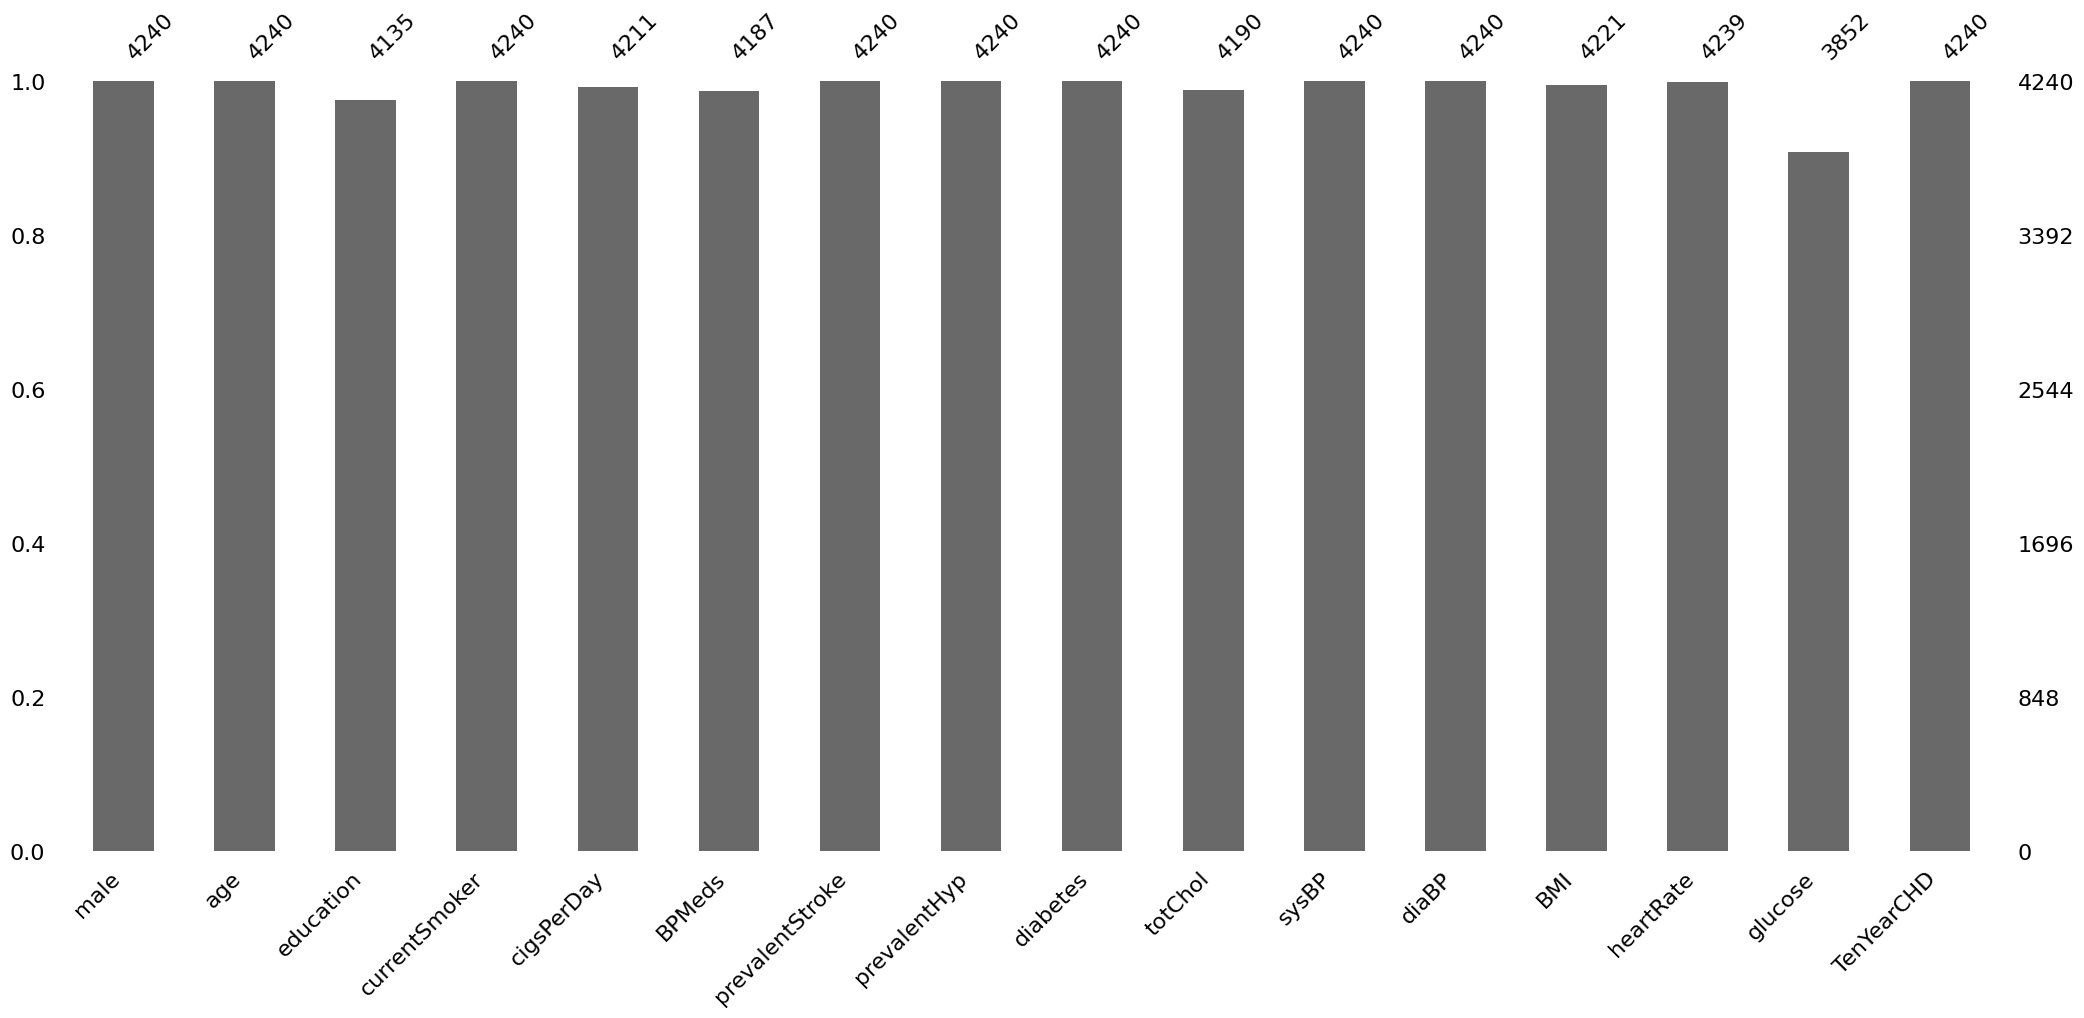

In [124]:
msno.bar(dataset)
plt.show()

###We have four columns that have significant number of missing values, thankfully none is above ten percent, that means that we can do the mean of these columns to fill these missing values

In [125]:
dataset['education']=dataset['education'].fillna(dataset['education'].mean())
dataset['BPMeds']=dataset['BPMeds'].fillna(dataset['BPMeds'].mean())
dataset['totChol']=dataset['totChol'].fillna(dataset['totChol'].mean())
dataset['glucose']=dataset['glucose'].fillna(dataset['glucose'].mean())

In [126]:
# we then check for remaining null values
dataset.isnull().sum() / dataset.shape[0] * 100

male              0.000
age               0.000
education         0.000
currentSmoker     0.000
cigsPerDay        0.684
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.448
heartRate         0.024
glucose           0.000
TenYearCHD        0.000
dtype: float64

In [127]:
# we drop the null values because it is not that significant
dataset = dataset.dropna()

In [128]:
# we then check again if there is any null value
dataset.isnull().sum() / dataset.shape[0] * 100

male              0.000
age               0.000
education         0.000
currentSmoker     0.000
cigsPerDay        0.000
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.000
heartRate         0.000
glucose           0.000
TenYearCHD        0.000
dtype: float64

we need to check if there are any duplicates

In [129]:
dataset.duplicated().sum()

0

##Exploring and visualizing our data

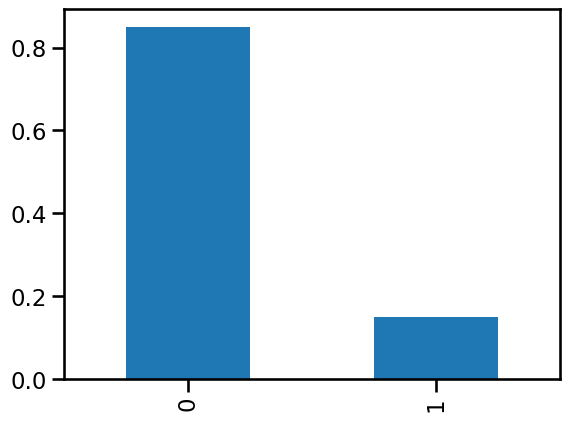

In [130]:
# we check our data the ratio of positive to negative to that which we are testing
dataset['TenYearCHD'].value_counts(normalize=True).plot(kind='bar')
plt.show()

Looking at the gender that is mostly affected by the heart disease we use a bar graph as shown below

Text(0.5, 1.0, 'CHD by Gender')

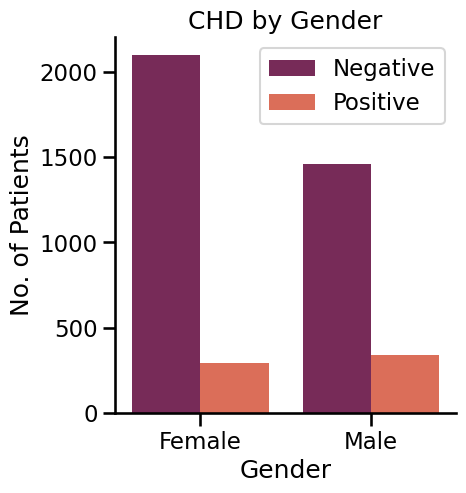

In [131]:
sns.catplot(x='male', hue='TenYearCHD', data=dataset, kind='count', palette='rocket', legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Negative', 'Positive'])
plt.title('CHD by Gender')

<Axes: xlabel='male'>

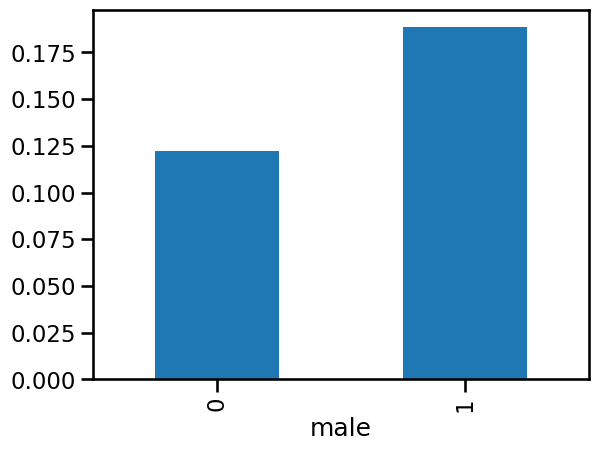

In [132]:
dataset.groupby('male')['TenYearCHD'].mean().plot(kind='bar')

In [133]:
dataset['gender']=dataset['male'].replace([0, 1], ['female', 'male'])

In [134]:
dataset.groupby('gender')['TenYearCHD'].mean()

gender
female   0.122
male     0.188
Name: TenYearCHD, dtype: float64

Text(0.5, 1.0, 'Age distribution of the patients')

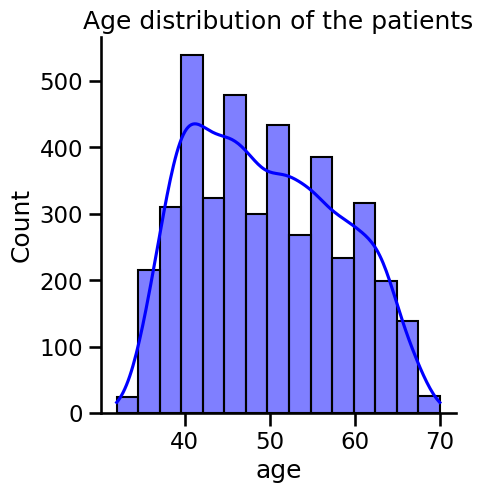

In [135]:
sns.displot(dataset['age'], bins=15, kde=True, color='blue')
plt.ylabel('Count')
plt.title('Age distribution of the patients')

Majority of the people suffering from the heart disease are in the range of 40 to 50 years then followed closely with the people from 50 to around 68

#Which age group has more smokers

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140')])

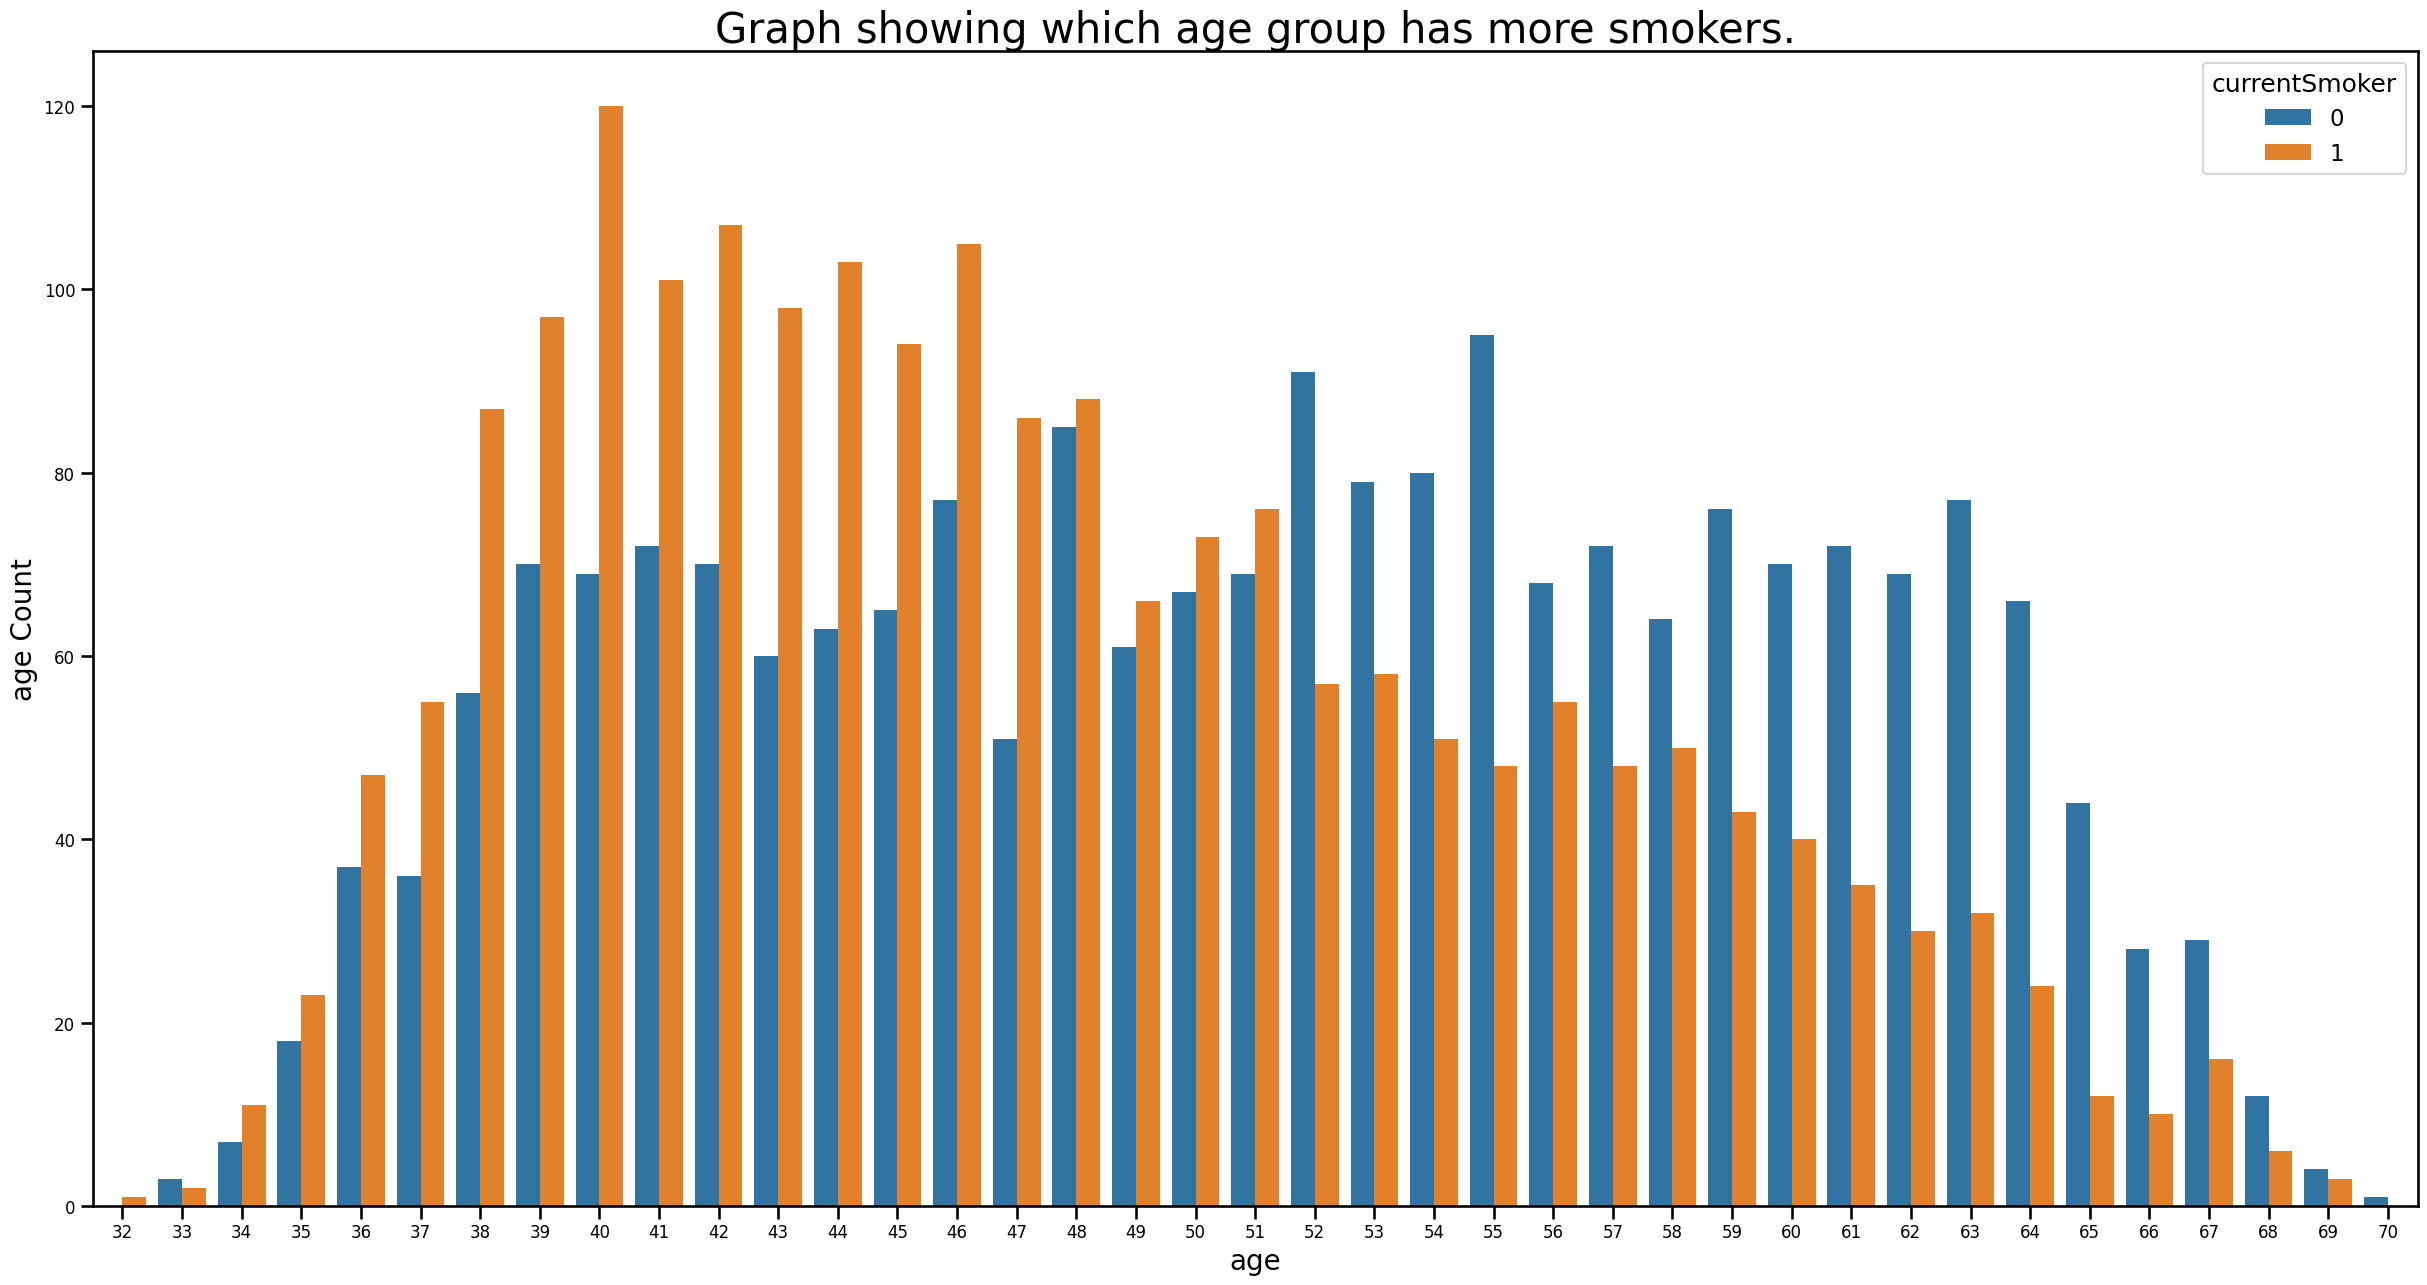

In [157]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=dataset,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers
No currentSmokers observed below the age of 32
maximum age for a currentSmokers is 70

<ipython-input-136-ffabbca0dab5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr()*100, annot=True, cmap='YlGnBu')


<Axes: >

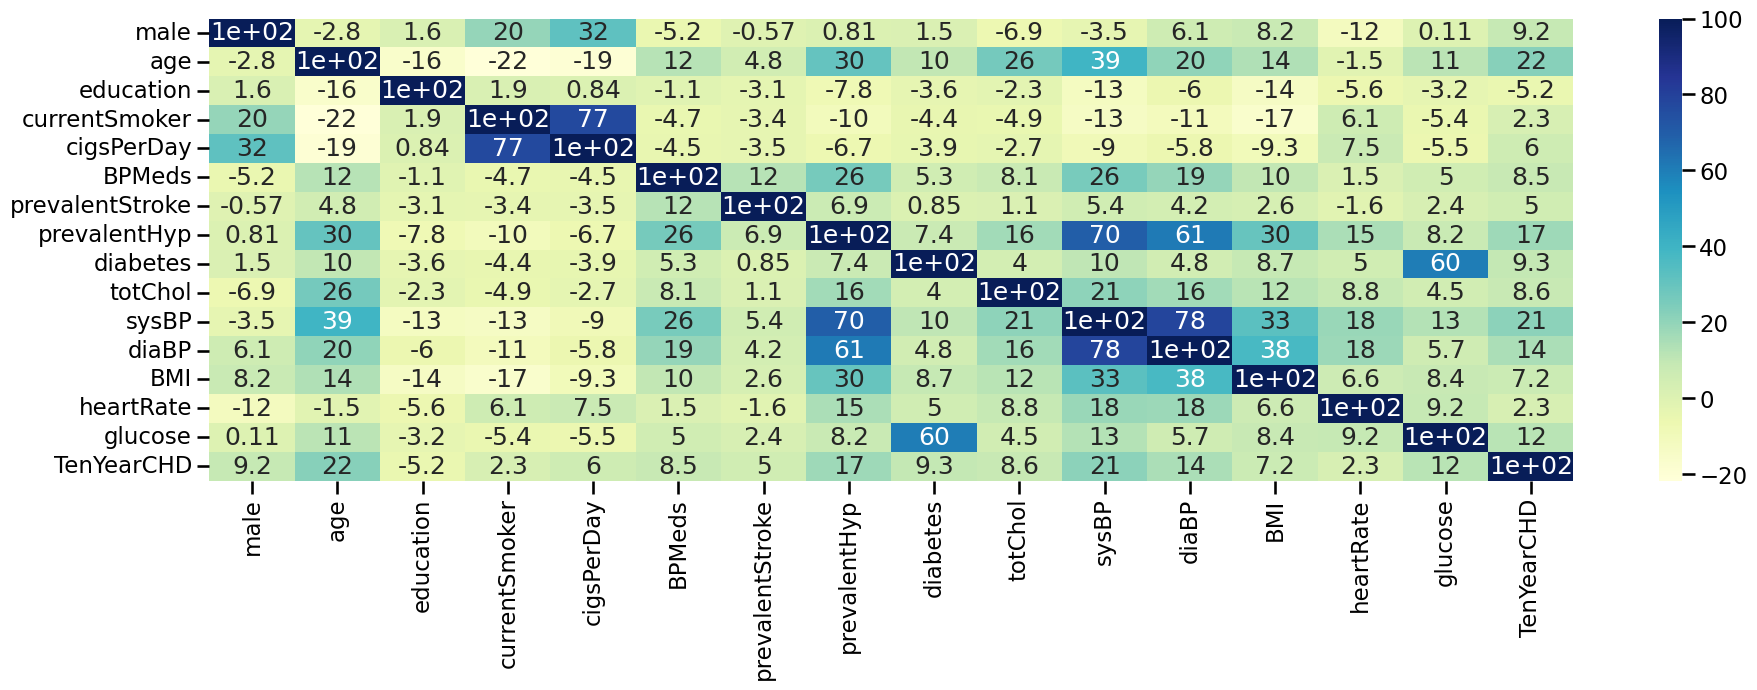

In [136]:
#Pearson Correlation

sns.set_context('talk')
plt.figure(figsize=(22,6))
sns.heatmap(dataset.corr()*100, annot=True, cmap='YlGnBu')

####We remove education since it has a negative correlation

In [137]:
newdf = dataset.drop(["education", "gender"], axis='columns')

In [138]:
#create a new dataframe and see if the education column has been dropped
newdf.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.000,0.000,0,0,0,195.000,106.000,70.000,26.970,80.000,77.000,0
1,0,46,0,0.000,0.000,0,0,0,250.000,121.000,81.000,28.730,95.000,76.000,0
2,1,48,1,20.000,0.000,0,0,0,245.000,127.500,80.000,25.340,75.000,70.000,0
3,0,61,1,30.000,0.000,0,1,0,225.000,150.000,95.000,28.580,65.000,103.000,1
4,0,46,1,23.000,0.000,0,0,0,285.000,130.000,84.000,23.100,85.000,85.000,0


#Predictive Modeling
#Making the machine Learning Model
For the dataset we use the following learning models
1. Logistic Regressor
2. K-Nearest Neighbour Classifier
3. Decision Tree Classifier

In [139]:
# see our target column to see the ratio between positive of what we are looking for to the negative
newdf['TenYearCHD'].value_counts(normalize=True)

0   0.849
1   0.151
Name: TenYearCHD, dtype: float64

When we look at our target variable there is an imbalance, in that the people suffering from CHD are only 0.15 of the total number that we haave in the system. Therefore, we have to find a way to deal with this. 
Let us first represent this data on a chart so that we can have an idea of the difference between the two.

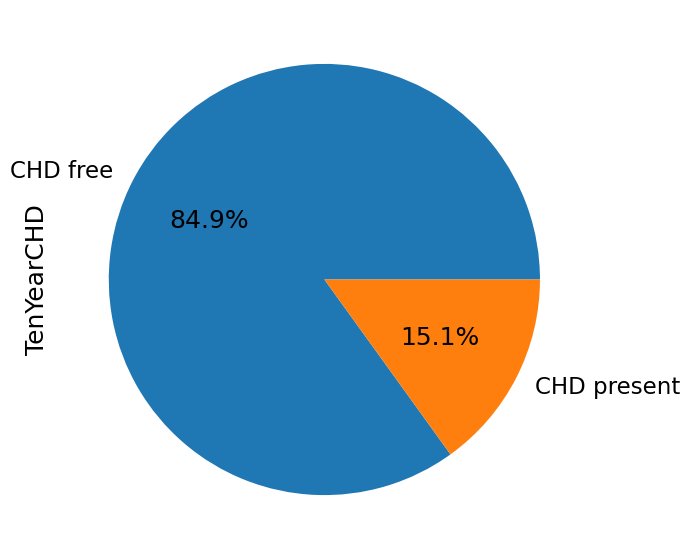

In [140]:
plt.figure(figsize=(10, 7))
newdf['TenYearCHD'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['CHD free', 'CHD present'])
plt.show()

We then normalize the dataset by having a standard scaled Data

In [141]:
#Normalizing dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = newdf.drop(['TenYearCHD'], axis=1).columns

norm_df = scaler.fit_transform(newdf.drop(['TenYearCHD'], axis=1))
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=newdf.drop(['TenYearCHD'], axis=1).index)                     
norm_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.153,-1.234,-0.982,-0.756,-0.176,-0.074,-0.671,-0.162,-0.941,-1.199,-1.085,0.287,0.344,-0.217
1,-0.868,-0.417,-0.982,-0.756,-0.176,-0.074,-0.671,-0.162,0.300,-0.516,-0.160,0.718,1.592,-0.261
2,1.153,-0.183,1.018,0.920,-0.176,-0.074,-0.671,-0.162,0.187,-0.220,-0.244,-0.113,-0.072,-0.525
3,-0.868,1.334,1.018,1.759,-0.176,-0.074,1.490,-0.162,-0.264,0.805,1.017,0.681,-0.904,0.930
4,-0.868,-0.417,1.018,1.172,-0.176,-0.074,-0.671,-0.162,1.090,-0.106,0.092,-0.661,0.760,0.136


#We then split the data into traning and validation groups

In [142]:
#train-test split
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

x = norm_df
y = newdf['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3143, 14), (1048, 14), (3143,), (1048,))

after spliting we get 3143 data for training and 1048 for testing
We will then put this in our Login Regression and CART model

#Decision Tree Classifier

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [144]:
# Create a CART model
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Fit the model to the training data
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [145]:
# Make predictions on the testing set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8435114503816794


#Logistic Regression Model
This is a simple algorithm but an effective one for that matter. Instead of using complicated algorithms we can use this one. Since the dataset we are using is relatively small, we are going to use liblinear as our solver 

In [146]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression(solver='liblinear')
log_regression.fit(x_train, y_train)

log_prediction = log_regression.predict(x_test)
log_prediction

array([0, 0, 0, ..., 0, 0, 0])

We then evaluate to check th eperformance of our model

Accuracy Score : 0.8492366412213741
Cross Validation Score :  0.8568220712282159
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       887
           1       0.62      0.05      0.09       161

    accuracy                           0.85      1048
   macro avg       0.73      0.52      0.50      1048
weighted avg       0.82      0.85      0.79      1048



<Axes: >

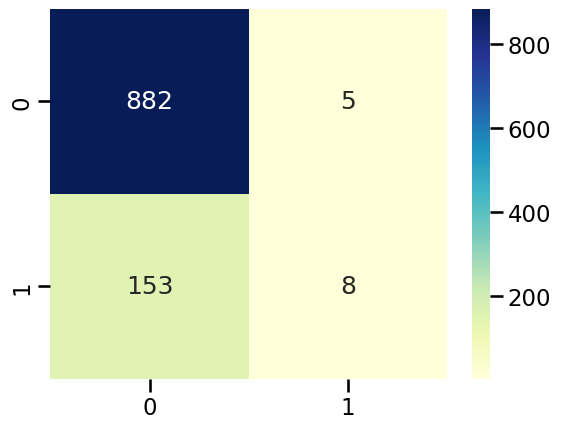

In [147]:
#Metrics Evaluation
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

print ('Accuracy Score :', accuracy_score(y_test, log_prediction))
print ('Cross Validation Score : ', cross_val_score(log_regression, x_train, y_train, cv=5).mean())
print (classification_report(y_test, log_prediction))

sns.heatmap(confusion_matrix(y_test, log_prediction), annot=True, cmap='YlGnBu', fmt='d')

The above accuracy score may be false since the dataset is imbalanced. the model will lean on the majority class when predicting and leave out the minority class, this will make us think that the model is working fine but it is not. In the confusion matrx we can see that in the negative diagnosis out of 887, 882 is correctly classified and only 5 of them wrongly classified. This is a type one error.In the positive diagnosis, out of 161, 8 are placed correctly and 153 are not

#K-Nearest Neighbour Classifier

confussion matrix
[[787 100]
 [131  30]]


Accuracy of k-NN Classification: 77.95801526717557 



<Axes: >

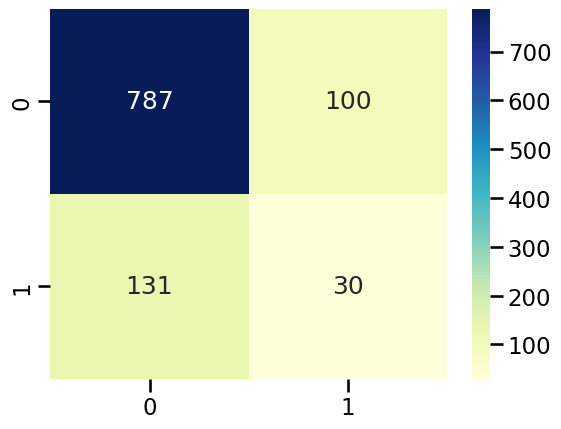

In [159]:
from sklearn.neighbors import KNeighborsClassifier
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
# print(classification_report(y_test, knn_predict))
sns.heatmap(confusion_matrix(y_test, knn_predict), annot=True, cmap='YlGnBu', fmt='d')

#Adding a class weight parameter

#Decision Tree Classifier

In [148]:
# Creating a CART model
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, class_weight={0: 0.25, 1: 0.75})

# Fit the model to the training data
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Accuracy: 0.7881679389312977
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       887
           1       0.29      0.26      0.27       161

    accuracy                           0.79      1048
   macro avg       0.58      0.57      0.58      1048
weighted avg       0.78      0.79      0.78      1048



<Axes: >

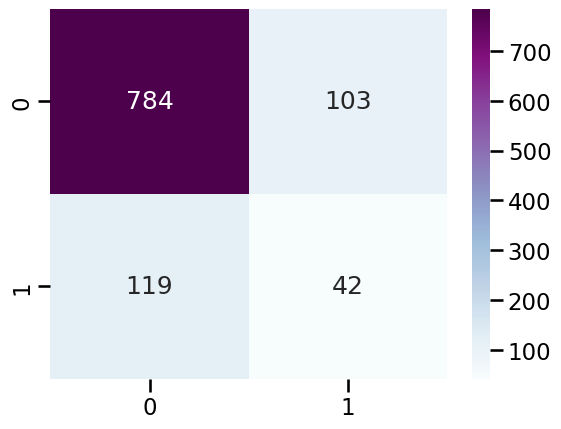

In [149]:
# Make predictions on the testing set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print (classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='BuPu', fmt='d')

In [ ]:
import joblib
joblib.dump(model, 'model1.joblib')


['model1.joblib']

The above accuracy score may be false since the dataset is imbalanced. the model will lean on the majority class when predicting and leave out the minority class, this will make us think that the model is working fine but it is not. In the confusion matrx we can see that in the negative diagnosis out of 887, 784 is correctly classified and 103 of them wrongly classified. This is a type one error.In the positive diagnosis, out of 161, 42 are placed correctly and 119 are not

#Using Logistic Regression Model

In [150]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

log_regression_cw = LogisticRegression(solver='liblinear', class_weight='balanced')
log_regression_cw.fit(x_train, y_train)

log_cw_prediction = log_regression_cw.predict(x_test)
log_cw_prediction

array([0, 0, 0, ..., 1, 0, 0])

In [151]:
import joblib
joblib.dump(log_regression_cw, 'model2.joblib')

['model2.joblib']

After adding Class Weight Parameter to our Logic Regression, we can see that there is a small difference in the above array
We then do an evaluation below to see the accuracy after adding the class weight

Accuracy Score : 0.6603053435114504
Cross Validation Score :  0.6687903152309296
              precision    recall  f1-score   support

           0       0.93      0.65      0.76       887
           1       0.27      0.71      0.39       161

    accuracy                           0.66      1048
   macro avg       0.60      0.68      0.58      1048
weighted avg       0.83      0.66      0.71      1048



<Axes: >

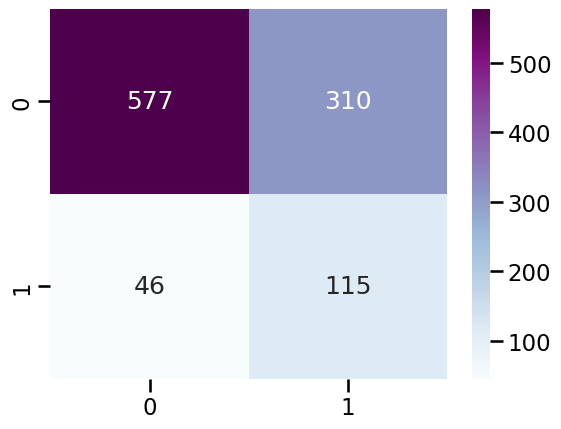

In [152]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, log_cw_prediction))
print ('Cross Validation Score : ', cross_val_score(log_regression_cw, x_train, y_train, cv=5).mean())
print (classification_report(y_test, log_cw_prediction))

sns.heatmap(confusion_matrix(y_test, log_cw_prediction), annot=True, cmap='BuPu', fmt='d')

The recall score improved after adding our class weight parameter to our estimator. if we look at the confusion matrix we see a better prediction than the previous one. Type 2 error has reduced to some extend

###SMOTE
We are going to oversample using smote
this creates synthetic observations based on existing minority observations

In [153]:
#Applying SMOTE

from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE

smote = SMOTE(sampling_strategy='not majority')
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# over = SMOTE(random_state=0)
# X_over, y_over = over.fit_resample(X, y)

print (y_train.value_counts(), '\n')
np.bincount(y_train_res)

0    2673
1     470
Name: TenYearCHD, dtype: int64 



array([2673, 2673])

The smote went fine since our values go to 2673 of each group. Then we test again using Logistic Regression

#Testing the Models after oversampling

#Decision Tree Classifier

Accuracy: 0.5629770992366412


<Axes: >

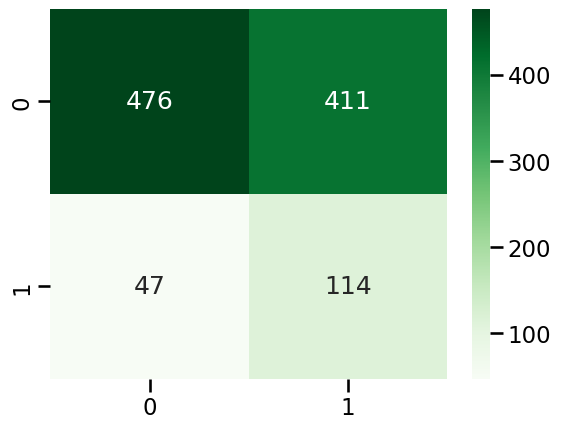

In [154]:
# Create a CART model with class weights
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Fit the model to the training data
model.fit(X_train_res, y_train_res)

# Make predictions on the testing set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens', fmt='d')

#Using Logistic Regression Model

In [155]:
reg_model = LogisticRegression(solver='liblinear', max_iter=1000, C=1).fit(X_train_res, y_train_res)
# Make predictions on the testing set
est_prediction = reg_model.predict(x_test)
est_prediction


array([0, 0, 0, ..., 1, 0, 0])

Accuracy Score : 0.6536259541984732
Cross Validation Score :  0.6780796097322155
              precision    recall  f1-score   support

           0       0.92      0.64      0.76       887
           1       0.26      0.70      0.38       161

    accuracy                           0.65      1048
   macro avg       0.59      0.67      0.57      1048
weighted avg       0.82      0.65      0.70      1048



<Axes: >

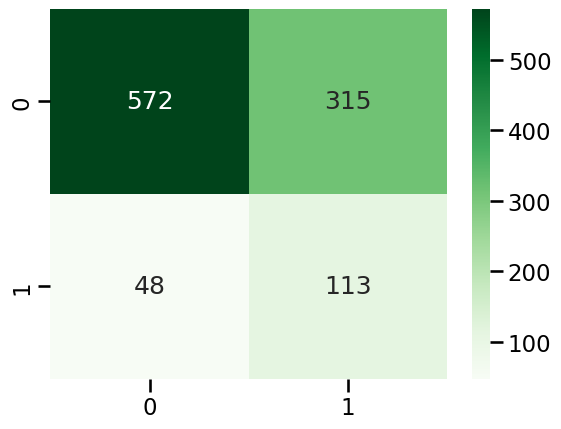

In [156]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, est_prediction))
print ('Cross Validation Score : ', cross_val_score(reg_model, X_train_res, y_train_res, cv=5).mean())
print (classification_report(y_test, est_prediction))

sns.heatmap(confusion_matrix(y_test, est_prediction), annot=True, cmap='Greens', fmt='d')

confussion matrix
[[696 191]
 [109  52]]


Accuracy of k-NN Classification: 71.37404580152672 



<Axes: >

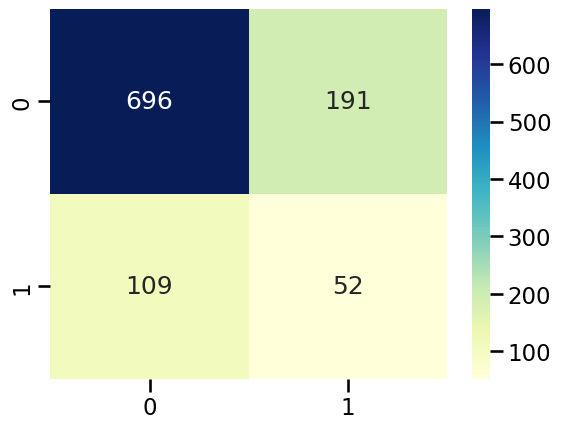

In [164]:
from sklearn.neighbors import KNeighborsClassifier
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train_res, y_train_res)
knn_predict = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
# print(classification_report(y_test, knn_predict))
sns.heatmap(confusion_matrix(y_test, knn_predict), annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
import joblib
joblib.dump(reg_model, 'model1.joblib')

From the obove confusion matrix we notice a reduction of type one error but type 2 error has not changed much. Type two error posses great threat since if someone is positive and is declared to be negative, it can be risky for diagnosis. 
####To fine tune this model we would have to get more data to test and also more parameters to make the model better. 
###However, so far Logistic Regression model is prefered since its accuracy model is higher than the decision tree model and Random Forest Classifier. 
####The model can help doctors take necessary measures for patients carrying high risk of heart disease. Insurance companies can also benefit from this if effective measures are taken then the number of claims can reduce. 